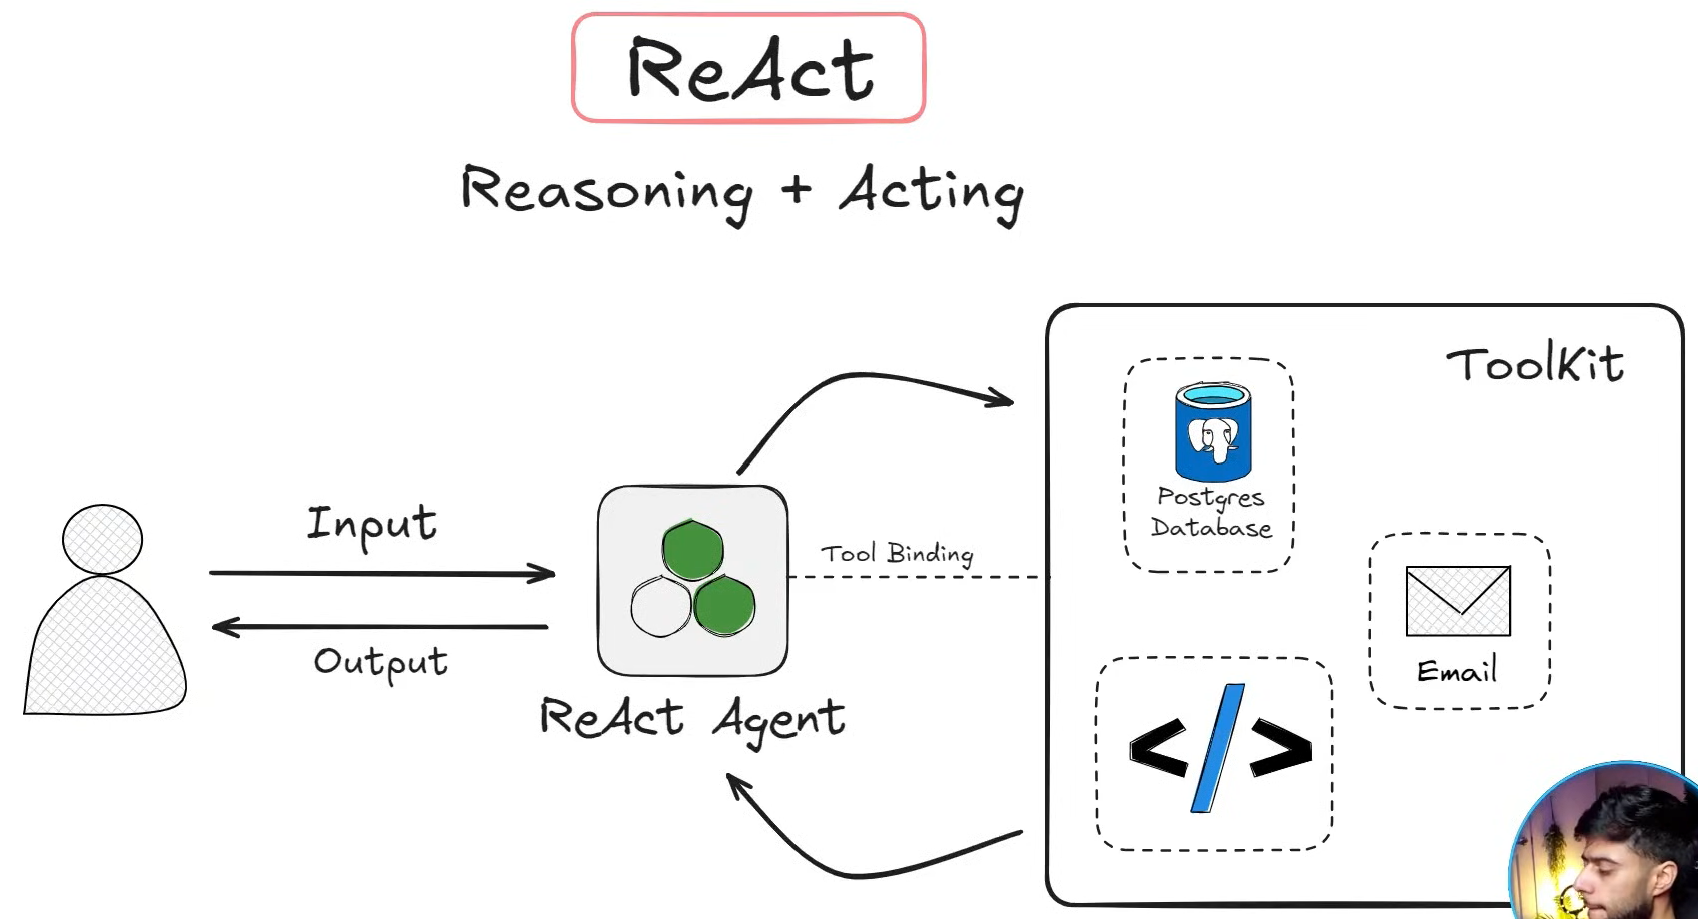

In [31]:
# LLM Initialization
import os
#from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage

#load_dotenv()
if os.environ.get("GROQ_API_KEY"):
    print("API key exists")
else:
    raise ValueError("Groq API Key not found")


groq_api_key =os.environ.get("GROQ_API_KEY")
llm = ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)

# Put all the imports at the top to make sure we have all modules in our notebook
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableSequence, RunnableLambda, RunnableBranch
from pydantic import BaseModel, Field
from typing import Literal


API key exists


In [ ]:
#Tool -1 [News Search Tool]

from langchain_community.tools import DuckDuckGoSearchRun
search_tool = DuckDuckGoSearchRun()

# Uncomment the line below to run this tool individually
search_tool.invoke("Latest news on AI")


"3 days ago · News coverage on artificial intelligence and machine learning tech, the companies building them, and the ethical issues AI raises today. 2 days ago · Latest in AI News · OpenAI to Test Ads on ChatGPT Free and Go Tiers in the US · BSNL, Viasat to Support Indian Navy Satellite Communications Upgrade · AI Deals ... Dec 29, 2025 · Here's a recap of our biggest AI updates from December, including the launch of Gemini 3 Flash, the release of new AI verification tools in the Gemini app ... 3 days ago · AI video generation startup Higgsfield raised $80 million in new funding, valuing the company at over $1.3 billion, it told Reuters, as investors rush to ... 6 days ago · Summary: Apple has officially announced that a completely reimagined, AI-powered version of Siri is set to debut in 2026. This fundamental transformation will ..."

: 

In [ ]:
# Tool -2 [Wikipedia Tool]

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

# Uncomment the line below to run this tool individually
wikipedia_tool.invoke("LangChain Framework")



"Page: LangChain\nSummary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.\n\n\n\nPage: FAISS\nSummary: FAISS (Facebook AI Similarity Search) is an open-source library for similarity search and clustering of vectors. It contains algorithms that search in sets of vectors of any size, up to ones that possibly do not fit in RAM. It also contains supporting code for evaluation and parameter tuning. \nFAISS is written in C++ with complete wrappers for Python and C. Some of the most useful algorithms are implemented on the GPU using CUDA.\n\nPage: Model Context Protocol\nSummary: The Model Context Protocol (MCP) is an open standard and open-source framework introduced by Anthropic in November 2024 to standardize the way ar

: 

In [ ]:
# Tool -3 [Custom Enterprise Tool]
from langchain.tools import tool
@tool
def enterprise_tool_email_send(query:str) -> str:
    """
    A tool to send emails to employees within the enterprise.
    """
    # Simulate sending an email
    return f"Email sent" 

: 

In [ ]:
ToolKit=[search_tool,wikipedia_tool,enterprise_tool_email_send]
ToolKit

[DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', max_results=5, backend='auto', source='text')),
 WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from 'c:\\Users\\kcsra\\Documents\\NareshIT\\ai_practice\\langchain_tutorial\\.venv\\Lib\\site-packages\\wikipedia\\__init__.py'>, top_k_results=3, lang='en', load_all_available_meta=False, doc_content_chars_max=4000)),
 StructuredTool(name='enterprise_tool_email_send', description='A tool to send emails to employees within the enterprise.', args_schema=<class 'langchain_core.utils.pydantic.enterprise_tool_email_send'>, func=<function enterprise_tool_email_send at 0x000001A06B6942C0>)]

: 

**ReAct Agent**

In [ ]:
# Note: Commenting out agent creation as it can cause kernel timeout when running all cells together.
# Uncomment the code below to create and test the agent individually:

from langchain.agents import create_agent

model = ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)
try:
    agent=create_agent(model=model,tools=ToolKit)
    print("Agent created successfully")
except Exception as e:
    print(f"Error creating agent: {e}")
    agent = None




Agent created successfully


: 

### **ReAct Agent Invoke with Streams**

In [ ]:
example_query="Get me the latest news on Stock market"

# Note: Commenting out agent.stream() as it can cause kernel timeout when running all cells together.
# Uncomment the code below to run the agent stream individually:
if agent:
    try:
        events=agent.stream(
            {"messages": [HumanMessage(content=example_query)]},
            stream_mode="values",
        )
        for event in events:
            event["messages"][-1].pretty_print()
    except Exception as e:
        print(f"Error in agent stream: {e}")



================================ Human Message =================================

Get me the latest news on Stock market
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (7655qk01m)
 Call ID: 7655qk01m
  Args:
    query: latest stock market news
================================= Tool Message =================================
Name: duckduckgo_search

2 hours ago · Global stock markets are bracing for falls when trading resumes on Monday after Donald Trump threatened eight European countries with fresh tariffs until they ... 7 hours ago · Enthusiasm for artificial intelligence's prospects will continue to drive the market higher in 2026. The gains won't be limited to tech stocks, ... 2 days ago · Up-to-date stock market data coverage from CNN. Get the latest updates on US markets, world markets, stock quotes, crypto, commodities and currencies. 3 days ago · The S&P 500 rose 0.76%, and the Nasdaq had gained 1.06%. Chip plays 

: 

### **Manually Binding the LLM with Tools**

In [ ]:
# Without Binding
# Note: Commenting out to prevent kernel timeout when running all cells together.
# Uncomment the code below to run it individually:

try:
    result = llm.invoke("What is Latest News on Stock Market?")
    print(result)
except Exception as e:
    print(f"Error: {e}")


content="I'll provide you with some general information on the stock market as of my cut-off date (December 2023). Please note that the stock market is constantly changing, and I may not have the latest information.\n\n**Current Trends:**\n\n1. **Interest Rates:** The Federal Reserve has been increasing interest rates to combat inflation. This has impacted the stock market, particularly in sectors such as technology and growth stocks.\n2. **Inflation:** Inflation has been a concern for investors, leading to higher interest rates and impacting sectors such as consumer staples and real estate.\n3. **Economic Growth:** The global economy has been experiencing a slowdown, which has impacted stock market performance.\n\n**Stock Market Performance:**\n\n1. **S&P 500:** The S&P 500 index has been relatively flat in 2023, with some ups and downs.\n2. **Dow Jones:** The Dow Jones Industrial Average has also been relatively flat in 2023.\n3. **NASDAQ:** The NASDAQ composite index has been impact

: 

In [ ]:
# With Binding
# Note: Commenting out to prevent kernel timeout when running all cells together.
# Uncomment the code below to run it individually:

try:
    llm_binded=llm.bind_tools(ToolKit)
    result = llm_binded.invoke("What is Latest News on Stock Market?")
    print(result)
except Exception as e:
    print(f"Error: {e}")



content='' additional_kwargs={'tool_calls': [{'id': '6apphgb3b', 'function': {'arguments': '{"query":"Latest News on Stock Market"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 457, 'total_tokens': 478, 'completion_time': 0.025737437, 'completion_tokens_details': None, 'prompt_time': 0.28259696, 'prompt_tokens_details': None, 'queue_time': 0.222929107, 'total_time': 0.308334397}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019bd353-2cfd-72f3-8b04-2a49438501ac-0' tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Latest News on Stock Market'}, 'id': '6apphgb3b', 'type': 'tool_call'}] invalid_tool_calls=[] usage_metadata={'input_tokens': 457, 'output_tokens': 21, 'total_tokens': 478}


: 